# Activity: Build a random forest model

## **Introduction**


As you're learning, random forests are popular statistical learning algorithms. Some of their primary benefits include reducing variance, bias, and the chance of overfitting.

This activity is a continuation of the project you began modeling with decision trees for an airline. Here, you will train, tune, and evaluate a random forest model using data from spreadsheet of survey responses from 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment. Your random forest model will be used to predict whether a customer will be satisfied with their flight experience.

**Note:** Because this lab uses a real dataset, this notebook first requires exploratory data analysis, data cleaning, and other manipulations to prepare it for modeling.

## **Step 1: Imports** 


Import relevant Python libraries and modules, including `numpy` and `pandas`libraries for data processing; the `pickle` package to save the model; and the `sklearn` library, containing:
- The module `ensemble`, which has the function `RandomForestClassifier`
- The module `model_selection`, which has the functions `train_test_split`, `PredefinedSplit`, and `GridSearchCV` 
- The module `metrics`, which has the functions `f1_score`, `precision_score`, `recall_score`, and `accuracy_score`


In [1]:
# Import `numpy`, `pandas`, `pickle`, and `sklearn`.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

# Import the relevant functions from `sklearn.ensemble`, `sklearn.model_selection`, and `sklearn.metrics`.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,\
classification_report, confusion_matrix, ConfusionMatrixDisplay

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

air_data = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `read_csv()` function from the `pandas` library can be helpful here.
 
</details>

Now, you're ready to begin cleaning your data. 

## **Step 2: Data cleaning** 

To get a sense of the data, display the first 10 rows.

In [3]:
# Display first 10 rows.

air_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `head()` function from the `pandas` library can be helpful here.
 
</details>

Now, display the variable names and their data types. 

In [4]:
# Display variable names and types.

air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

DataFrames have an attribute that outputs variable names and data types in one result.
 
</details>

**Question:** What do you observe about the differences in data types among the variables included in the data?

There are 3 different datatypes: object, int, and float.

`satisfaction`, `Customer Type`, `Type of Travel`, and `Class` are object types.  
`Arrival Delay in Minutes` is float.  
The rest are int.

Next, to understand the size of the dataset, identify the number of rows and the number of columns.

In [5]:
# Identify the number of rows and the number of columns.

# info() already shows the number of rows and columns
# 129880 rows and 22 columns

In [6]:
# Find number of unique value(s) in each column

air_data.nunique()

satisfaction                            2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [7]:
# Print unique values from each column

for col in air_data:
    print(col)
#    print(air_data[col].unique())
    print(sorted(air_data[col].unique()))
    print()

# Another way to display unique values from each column, but in condensed format
#air_data.apply(np.unique)

satisfaction
['dissatisfied', 'satisfied']

Customer Type
['Loyal Customer', 'disloyal Customer']

Age
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 85]

Type of Travel
['Business travel', 'Personal Travel']

Class
['Business', 'Eco', 'Eco Plus']

Flight Distance
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 153, 163, 168, 180, 186, 192, 194, 200, 20

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

There is a method in the `pandas` library that outputs the number of rows and the number of columns in one result.

</details>

Now, check for missing values in the rows of the data. Start with .isna() to get Booleans indicating whether each value in the data is missing. Then, use .any(axis=1) to get Booleans indicating whether there are any missing values along the columns in each row. Finally, use .sum() to get the number of rows that contain missing values.

In [8]:
# Get Booleans to find missing values in data.
# Get Booleans to find missing values along columns.
# Get the number of rows that contain missing values.

print('Number of rows with missing data: ', air_data.isna().any(axis=1).sum(), sep='')
print()
print('Number of missing data in each column:')
print(air_data.isna().sum(axis=0))
print()
print('Row(s) with missing data:')
print(air_data[air_data.isna().any(axis=1)])

Number of rows with missing data: 393

Number of missing data in each column:
satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Row(s)

**Question:** How many rows of data are missing values?**

There ar 393 rows with missing data.

Drop the rows with missing values. This is an important step in data cleaning, as it makes the data more useful for analysis and regression. Then, save the resulting pandas DataFrame in a variable named `air_data_subset`.

In [9]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.

air_data_subset = air_data.dropna(axis=0).reset_index(drop=True)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `dropna()` function is helpful here.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The axis parameter passed in to this function should be set to 0 (if you want to drop rows containing missing values) or 1 (if you want to drop columns containing missing values).
</details>

Next, display the first 10 rows to examine the data subset.

In [10]:
# Display the first 10 rows.

air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


Confirm that it does not contain any missing values.

In [11]:
# Count of missing values.

print('Number of rows with missing data: ', air_data_subset.isna().any(axis=1).sum(), sep='')
print()
print('Number of missing data in each column:')
print(air_data_subset.isna().sum(axis=0))

Number of rows with missing data: 0

Number of missing data in each column:
satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can use the `.isna().sum()` to get the number of missing values for each variable.

</details>

Next, convert the categorical features to indicator (one-hot encoded) features. 

**Note:** The `drop_first` argument can be kept as default (`False`) during one-hot encoding for random forest models, so it does not need to be specified. Also, the target variable, `satisfaction`, does not need to be encoded and will be extracted in a later step.

In [12]:
# Convert categorical features to one-hot encoded features.

air_data_subset_dummies = pd.get_dummies(air_data_subset, drop_first=False,
                                         columns=['Customer Type', 'Type of Travel', 'Class'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can use the `pd.get_dummies()` function to convert categorical variables to one-hot encoded variables.
</details>

**Question:** Why is it necessary to convert categorical data into dummy variables?**

The model requires numerical values for categorical features.

Next, display the first 10 rows to review the `air_data_subset_dummies`. 

In [13]:
# Display the first 10 rows.

air_data_subset_dummies.head(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,0,1,0,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,0,1,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,0,1,0,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,0,1,0,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,0,1,0,1,0
5,satisfied,30,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,1,0,0,1,0,1,0
6,satisfied,66,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0,1,0,0,1,0,1,0
7,satisfied,10,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0,1,0,0,1,0,1,0
8,satisfied,56,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0,1,0,0,1,1,0,0
9,satisfied,22,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0,1,0,0,1,0,1,0


Then, check the variables of air_data_subset_dummies.

In [14]:
# Display variables.

air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer           uint8
Customer Type_disloyal Customer        uint8
Type of Travel_Business travel         uint8
Type of Tr

**Question:** What changes do you observe after converting the string data to dummy variables?**

The encoded variables are now of int datatypes. The variables now have their name concatenated with their respective unique values.  
`Customer Type_Loyal Customer`  
`Customer Type_disloyal Customer`  
`Type of Travel_Business travel`  
`Type of Travel_Personal Travel`  
`Class_Business`  
`Class_Eco`  
`Class_Eco Plus`

## **Step 3: Model building** 

The first step to building your model is separating the labels (y) from the features (X).

In [15]:
# Separate the dataset into labels (y) and features (X).

y = air_data_subset_dummies['satisfaction']
X = air_data_subset_dummies.drop(['satisfaction'], axis=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Save the labels (the values in the `satisfaction` column) as `y`.

Save the features as `X`. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To obtain the features, drop the `satisfaction` column from the DataFrame.

</details>

Once separated, split the data into train, validate, and test sets. 

In [16]:
# Separate into train, validate, test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `train_test_split()` function twice to create train/validate/test sets, passing in `random_state` for reproducible results. 

</details>

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Split `X`, `y` to get `X_train`, `X_test`, `y_train`, `y_test`. Set the `test_size` argument to the proportion of data points you want to select for testing. 

Split `X_train`, `y_train` to get `X_tr`, `X_val`, `y_tr`, `y_val`. Set the `test_size` argument to the proportion of data points you want to select for validation. 

</details>

### Tune the model

Now, fit and tune a random forest model with separate validation set. Begin by determining a set of hyperparameters for tuning the model using GridSearchCV.


In [17]:
# Determine set of hyperparameters.

# Assign a dictionary of hyperparameters to search over
cv_params = {'n_estimators' : [50,100],
              'max_depth' : [10,50],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ['sqrt'],
              'max_samples' : [.5,.9]}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a dictionary `cv_params` that maps each hyperparameter name to a list of values. The GridSearch you conduct will set the hyperparameter to each possible value, as specified, and determine which value is optimal.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The main hyperparameters here include `'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features', and 'max_samples'`. These will be the keys in the dictionary `cv_params`.

</details>

Next, create a list of split indices.

In [18]:
# Create list of split indices.

# 0 in index i will indicate to GridSearchCV that index i of X_train
# is to be held out for validation (0 is validation data).

# -1 at a given index will indicate that the index of X_train
# is to be used as training data (-1 is training data).

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use list comprehension, iterating over the indices of `X_train`. The list can consists of 0s to indicate data points that should be treated as validation data and -1s to indicate data points that should be treated as training data.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `PredfinedSplit()`, passing in `split_index`, saving the output as `custom_split`. This will serve as a custom split that will identify which data points from the train set should be treated as validation data during GridSearch.

</details>

Now, instantiate your model.

In [19]:
# Instantiate model.

rf = RandomForestClassifier(random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results. This will help you instantiate a random forest model, `rf`.

</details>

Next, use GridSearchCV to search over the specified parameters.

In [20]:
# Search over specified parameters.
# n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
# verbose=1 means the computation time for each fold and parameter candidate is displayed.

rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs=-1, verbose=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `GridSearchCV()`, passing in `rf` and `cv_params` and specifying `cv` as `custom_split`. Additional arguments that you can specify include: `refit='f1', n_jobs = -1, verbose = 1`. 

</details>

Now, fit your model.

In [21]:
%%time

# Fit the model.

rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  32 | elapsed:   26.5s remaining:  6.6min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.4min finished


CPU times: user 7.03 s, sys: 521 ms, total: 7.55 s
Wall time: 1min 27s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weig...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, ra

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `fit()` method to train the GridSearchCV model on `X_train` and `y_train`. 

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Add the magic function `%%time` to keep track of the amount of time it takes to fit the model and display this information once execution has completed. Remember that this code must be the first line in the cell.

</details>

Finally, obtain the optimal parameters.

In [22]:
# Obtain optimal parameters.

rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `best_params_` attribute to obtain the optimal values for the hyperparameters from the GridSearchCV model.

</details>

## **Step 4: Results and evaluation** 

Use the selected model to predict on your test data. Use the optimal parameters found via GridSearchCV.

In [23]:
# Use optimal parameters on GridSearchCV.

rf_opt = RandomForestClassifier(n_estimators=50, max_depth=50, 
                                min_samples_leaf=1, min_samples_split=0.001,
                                max_features='sqrt', max_samples=0.9, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use `RandomForestClassifier()`, specifying the `random_state` argument for reproducible results and passing in the optimal hyperparameters found in the previous step. To distinguish this from the previous random forest model, consider naming this variable `rf_opt`.

</details>

Once again, fit the optimal model.

In [24]:
# Fit the optimal model.

rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `fit()` method to train `rf_opt` on `X_train` and `y_train`.

</details>

And predict on the test set using the optimal model.

In [25]:
# Predict on test set.

y_pred = rf_opt.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `predict()` function to make predictions on `X_test` using `rf_opt`. Save the predictions now (for example, as `y_pred`), to use them later for comparing to the true labels. 

</details>

### Obtain performance scores

First, get your precision score.

In [26]:
# Get precision score.

pc_test = precision_score(y_test, y_pred, pos_label='satisfied')
print('The precision score is {pc:.3f}'.format(pc=pc_test))

The precision score is 0.950


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `precision_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Then, collect the recall score.

In [27]:
# Get recall score.

rc_test = recall_score(y_test, y_pred, pos_label='satisfied')
print('The recall score is {rc:.3f}'.format(rc=rc_test))

The recall score is 0.945


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `recall_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Next, obtain your accuracy score.

In [28]:
# Get accuracy score.

ac_test = accuracy_score(y_test, y_pred)
print('The accuracy score is {ac:.3f}'.format(ac=ac_test))

The accuracy score is 0.942


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `accuracy_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

Finally, collect your F1-score.

In [29]:
# Get F1 score.

f1_test = f1_score(y_test, y_pred, pos_label='satisfied')
print('The F1 score is {f1:.3f}'.format(f1=f1_test))

The F1 score is 0.947


In [30]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

dissatisfied      0.933     0.940     0.937     14642
   satisfied      0.950     0.945     0.947     17730

    accuracy                          0.942     32372
   macro avg      0.942     0.942     0.942     32372
weighted avg      0.943     0.942     0.942     32372



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

You can call the `f1_score()` function from `sklearn.metrics`, passing in `y_test` and `y_pred` and specifying the `pos_label` argument as `"satisfied"`.
</details>

**Question:** How is the F1-score calculated?

F1-Score = 2 * (precision * recall) / (precision + recall)

**Question:** What are the pros and cons of performing the model selection using test data instead of a separate validation dataset?

Pros:  
*  The coding workload is reduced.
*  The scripts for data splitting are shorter.
*  It's only  necessary to evaluate test dataset performance once, instead of two evaluations (validate and test).

Cons:  
* If a model is evaluated using samples that were also used to build or fine-tune that model, it likely will provide a biased evaluation.
* A potential overfitting issue could happen when fitting the model's scores on the test data.

### Evaluate the model

Now that you have results, evaluate the model. 

**Question:** What are the four basic parameters for evaluating the performance of a classification model?

1. True positives (TP): These are correctly predicted positive values, which means the value of actual and predicted classes are positive. 

2. True negatives (TN): These are correctly predicted negative values, which means the value of the actual and predicted classes are negative.

3. False positives (FP): This occurs when the value of the actual class is negative and the value of the predicted class is positive.

4. False negatives (FN): This occurs when the value of the actual class is positive and the value of the predicted class in negative. 

When fitting and tuning classification models, data professioals aim to minimize false positives and false negatives.

**Question:**  What do the four scores demonstrate about your model, and how do you calculate them?

- Accuracy (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. 
 
- Precision (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations. 

- Recall (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

- F1 score: The harmonic average of precision and recall, which takes into account both false positives and false negatives.

### Confusion matrix

In [31]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 

    # Make predictions on (x) test data
    model_pred = model.predict(x_data)
    
    # Compute values for confusion matrix
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    
    # Create display of confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    # Plot confusion matrix
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    
    # Display plot
    plt.show()

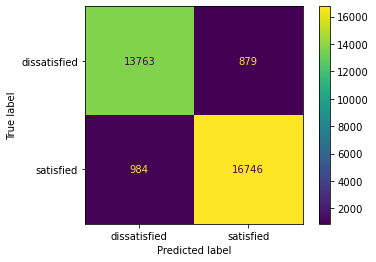

In [32]:
# Generate confusion matrix

conf_matrix_plot(rf_opt, X_test, y_test)

### Build feature importance graph

In [33]:
def forest_importances_plot(model, x_data):
    '''
    Accepts as argument model object, X data (test or validate). 
    Returns a plot of forest_importances.
    ''' 
    
    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=x_data.columns).sort_values(ascending=False)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax);

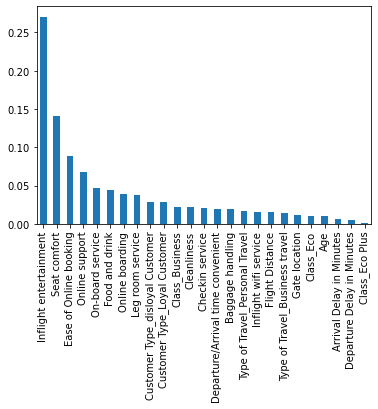

In [34]:
# Plot and display `feature_importances_` attribute relative to each feature

forest_importances_plot(rf_opt, X)

Calculate the scores: precision score, recall score, accuracy score, F1 score.

In [35]:
# Precision score on test data set.

print('\nThe precision score is: {pc:.3f}'.format(pc=pc_test), 'for the test set,', '\nwhich means of all positive predictions,', '{pc_pct:.1f}% prediction are true positive.'.format(pc_pct=pc_test*100))


The precision score is: 0.950 for the test set, 
which means of all positive predictions, 95.0% prediction are true positive.


In [36]:
# Recall score on test data set.

print('\nThe recall score is: {rc:.3f}'.format(rc=rc_test), 'for the test set,', '\nwhich means of all real positive cases in test set,', '{rc_pct:.1f}% are predicted positive.'.format(rc_pct=rc_test*100))


The recall score is: 0.945 for the test set, 
which means of all real positive cases in test set, 94.5% are predicted positive.


In [37]:
# Accuracy score on test data set.

print('\nThe accuracy score is: {ac:.3f}'.format(ac=ac_test), 'for the test set,', '\nwhich means of all cases in test set,', '{ac_pct:.1f}% are predicted true positive or true negative.'.format(ac_pct=ac_test*100))


The accuracy score is: 0.942 for the test set, 
which means of all cases in test set, 94.2% are predicted true positive or true negative.


In [38]:
# F1 score on test data set.

print('\nThe F1 score is: {f1:.3f}'.format(f1=f1_test), 'for the test set,', '\nwhich means the test set\'s harmonic mean is {f1_pct:.1f}%.'.format(f1_pct=f1_test*100))


The F1 score is: 0.947 for the test set, 
which means the test set's harmonic mean is 94.7%.


**Question:** How does this model perform based on the four scores?

The model performs well according to all 4 performance metrics. The model's precision score is slightly better than the 3 other metrics. 

### Evaluate the model

Finally, create a table of results that you can use to evaluate the performace of your model.

In [39]:
# Create table of results.

table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest"],
                        'F1':  [0.945422, f1_test],
                        'Recall': [0.935863, rc_test],
                        'Precision': [0.955197, pc_test],
                        'Accuracy': [0.940864, ac_test]
                      }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Build a table to compare the performance of the models. Create a DataFrame using the `pd.DataFrame()` function.

</details>

**Question:** How does the random forest model compare to the decision tree model you built in the previous lab?

The tuned random forest has higher scores overall, so it is the better model. Particularly, it shows a better F1 score than the decision tree model, which indicates that the random forest model may do better at classification when taking into account false positives and false negatives. 

## **Considerations**


**What are the key takeaways from this lab? Consider important steps when building a model, most effective approaches and tools, and overall results.**

- Data exploring, cleaning, and encoding are necessary for model building.
- A separate validation set is typically used for tuning a model, rather than using the test set. This also helps avoid the evaluation becoming biased.
-  F1 scores are usually more useful than accuracy scores. If the cost of false positives and false negatives are very different, it’s better to use the F1 score and combine the information from precision and recall. 
* The random forest model yields a more effective performance than a decision tree model. 

**What summary would you provide to stakeholders?**

* The random forest model predicted satisfaction with more than 94.2% accuracy. The precision is over 95% and the recall is approximately 94.5%. 
* The random forest model outperformed the tuned decision tree with the best hyperparameters in most of the four scores. This indicates that the random forest model may perform better.
* Because stakeholders were interested in learning about the factors that are most important to customer satisfaction, this would be shared based on the tuned random forest. 
* In addition, you would provide details about the precision, recall, accuracy, and F1 scores to support your findings. 

### References

[What is the Difference Between Test and Validation Datasets?,  Jason Brownlee](https://machinelearningmastery.com/difference-test-validation-datasets/)

[Decision Trees and Random Forests Neil Liberman](https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged